In [1]:
import    warnings
warnings.filterwarnings("ignore")
import    pandas      as    pd

In [2]:
def spot_check_model_performance(n_splits, random_state, df, Xcols, ycols):  

    ### To compare algorithms
    
    import  matplotlib.pyplot           as       plt
    from    sklearn.model_selection     import   StratifiedKFold
    from    sklearn.model_selection     import   cross_val_score
    from    sklearn.linear_model        import   LogisticRegression
    from    sklearn.tree                import   DecisionTreeClassifier
    from    sklearn.neighbors           import   KNeighborsClassifier
    from    sklearn.naive_bayes         import   GaussianNB
    from    sklearn.ensemble            import   RandomForestClassifier
    from    sklearn.preprocessing       import   LabelEncoder
    ### 
    ### Drop nulls
    ###
    df.dropna(inplace = True) 
    ### Prepare models
    
    models  = []
    models.append(('LR', LogisticRegression(max_iter = 10000)))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    ###
    ### Convert to numerical variables using label encoding
    ###
    # Get list of categorical variables
    s           =  (df.dtypes == 'object')
    object_cols =  list(s[s].index)

    if len(object_cols) > 1:
    	print("Categorical variables:")
    	print(object_cols)

	# Convert categorical data to numerical data using LabelEncoder
    	le          = LabelEncoder()    
    	for col in object_cols:
    	    df[col] = le.fit_transform(df[col])
    ### End of if
    print(df.head(2).T)
    print("\nLabel encoding\n")
    print(df.info())
    ### Evaluate model in turn    
    X           =   df.loc[:, Xcols]
    y           =   df.loc[:, ycols]
    predictors  =   Xcols
    target      =   ycols                     
    scores_req  =  ['recall']
    print("\n n_splits %d random_state %d" % (n_splits, random_state)) 
    df_recall     =   pd.DataFrame()   
    print("\nTarget variable {}".format(target))
    print("\nPredictor variables: {}".format(predictors))
    for i in range(len(scores_req)):
            results    =   []
            names      =   []        
            scoring    =  scores_req[i]
            
            print(scoring)
            
            for name, model in models:
    
                skf             =   StratifiedKFold(n_splits = n_splits, random_state = random_state, shuffle = True)
                cv_results      =   cross_val_score(model, X, y, cv = skf, scoring = scoring)
                results.append(cv_results)	
                names.append(name)
                msg            =  "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
                df_1           =   pd.DataFrame({'Model' : name, 'Recall': cv_results.mean()}, index = [0] )
                df_recall      =   pd.concat([df_recall, df_1], axis = 0) 
                print(msg)            
            df_recall.sort_values(by = ['Recall'], ascending = False, inplace = True) 
            best_model   =   df_recall.head(1)['Model'][0]
            best_recall  =   round(df_recall.head(1)['Recall'][0],6)
 
            ### Box plot algorithm comparison            
            sub_title = 'Algorithm Comparison using ' + scoring            
            fig = plt.figure()
            fig.suptitle(sub_title)
            ax  = fig.add_subplot(111)
            plt.boxplot(results)
            ax.set_xticklabels(names, rotation = 90)
            txt  =  "Highest recall for minority class is {1}, for the model {0}".format(best_model, best_recall)
            print(txt)
            plt.text(0, 2, txt, fontsize = 16)
            plt.show()
            print("Using KFold cross-validation, we observed that the highest recall for minority class is {0}, for the model {1}".format(best_model, best_recall))
###

(10000, 18)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

 Rows 10000 Columns 18
Categorical variables:
['Surname', 'Geography', 'Gender', 'Card Type']
                              0            1
RowNumber                  1.00         2.00
CustomerId          15634602.00  15647311.00
Surname                 1115.00      1177.00
CreditScore              619.00       608.00
Geography                  0.00         2.00
Gender                     0.00         0.00
Age                       42.00        41.00
Tenure                     2.00         1.00
Balance                    0.00     83807.86
NumOfProducts              1.00         1.00
HasCrCard                  1.00         0.00
IsActiveMember             1.00         1.00
EstimatedSala

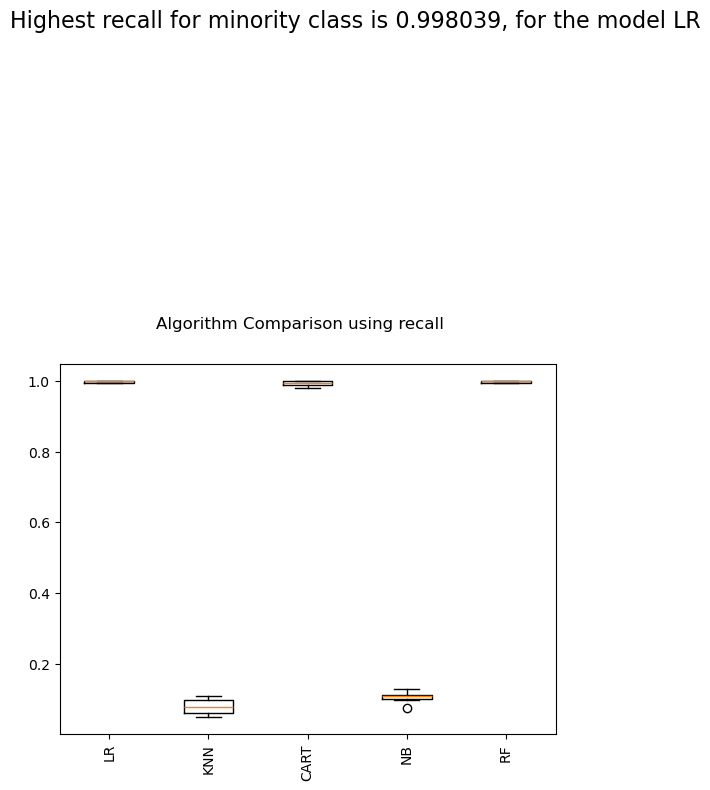

Using KFold cross-validation, we observed that the highest recall for minority class is LR, for the model 0.998039


In [3]:
file = r'G:\DSE-FT-C-May24-G5\Data\Customer-Churn-Records.csv'

df =  pd.read_csv(file, encoding = 'Latin-1')
print(df.shape)
print(df.columns)

Xcols      =    ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary',\
                 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned']
ycols      =    ['Exited']  
             
print("\n Rows {0} Columns {1}".format(df.shape[0], df.shape[1]))
target = 'Exited'     
n_splits = 10; random_state = 12345;            
spot_check_model_performance(n_splits, random_state, df, Xcols, ycols)        

### Observations

Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as customer churn, the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).